### The performance and operation of Ludwig depends on your system so let's start by displaying the standard OS details

In [2]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="16.04.5 LTS (Xenial Xerus)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 16.04.5 LTS"
VERSION_ID="16.04"
HOME_URL="http://www.ubuntu.com/"
SUPPORT_URL="http://help.ubuntu.com/"
BUG_REPORT_URL="http://bugs.launchpad.net/ubuntu/"
VERSION_CODENAME=xenial
UBUNTU_CODENAME=xenial


### try.dominodatalab.com does not offer GPUs, but you may take this code and use it standard Domino or in another system that does have GPU support

### The following shows your NVIDIA driver details (assuming you are using NVIDIA)

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


### This is a check to see if your GPU is talking correctly to your NVIDIA driver

In [4]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### Install Ludwig

#### In your standard Domino system you would want to add this to the docker instructions in your environment to avoid installing each time you start a workspace

In [5]:
!pip install ludwig --user

    100% |████████████████████████████████| 29.8MB 2.1MB/s eta 0:00:01    84% |███████████████████████████     | 25.2MB 46.6MB/s eta 0:00:01
    100% |████████████████████████████████| 2.1MB 22.4MB/s ta 0:00:01
    100% |████████████████████████████████| 3.2MB 17.0MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 34.1MB/s ta 0:00:01
    100% |████████████████████████████████| 184kB 38.9MB/s ta 0:00:01
    100% |████████████████████████████████| 3.2MB 17.8MB/s ta 0:00:01


tensorflow-gpu 1.12.0 has requirement tensorboard<1.13.0,>=1.12.0, but you'll have tensorboard 1.13.1 which is incompatible.
tensorboard 1.13.1 has requirement absl-py>=0.4, but you'll have absl-py 0.3.0 which is incompatible.
  The script tensorboard is installed in '/home/ubuntu/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### absl also needs to be installed in the environment supported on try.dominodatalab.com

In [6]:
!pip install absl-py==0.4

    100% |████████████████████████████████| 92kB 5.7MB/s ta 0:00:011
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/59/23/a2/6a23b5ce3040b3dbb7ce5c21fa135ddae15c2966bf4a32836c
Successfully built absl-py
tensorflow-gpu 1.12.0 has requirement tensorboard<1.13.0,>=1.12.0, but you'll have tensorboard 1.13.1 which is incompatible.
  Found existing installation: absl-py 0.3.0
    Uninstalling absl-py-0.3.0:
      Successfully uninstalled absl-py-0.3.0
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### This command kickes off an experiment which combines training and test into a single handy command

#### Kicking off experiments via command line syntax is currently the recommended approach until the Python API is more fully developed

#### The YAML file has a limit of 3 epochs as try.dominodatalab.com does not offer GPUs and even 3 ephocs can take a while. The recommended value is 99. Ludwig experiments will use validation testing to determine the optimal stopping point. Ludwig experiments run much faster with GPUs which you could access in a standard Domino deploy.

In [18]:
!ludwig experiment --data_csv ../data/raw/reuters-allcats.csv --model_definition_file ../model_definition.yaml \
--output_directory ../results --skip_save_progress

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.1.2 - Experiment

Experiment name: experiment
Model name: run
Output path: ../results/experiment_run_3


ludwig_version: '0.1.2'
command: ('/usr/local/anaconda/bin/ludwig experiment --data_csv '
 '../data/raw/reuters-allcats.csv --model_definition_file '
 '../model_definition.yaml --output_directory ../results --skip_save_progress')
random_seed: 42
input_data: '../data/raw/reuters-allcats.csv'
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'encoder': 'parallel_cnn',
                              'level': 'word',
                              'name': 'text',
                              'tied_weights': None,
                              'type': 'text'}],
    'output_features': [   {   'dependencies': [],
                               'loss': {   'class_similarities_tempera

Validation loss on combined improved, model saved


Epoch 2
Evaluation test : 100%|███████████████████████████| 7/7 [00:06<00:00,  1.11it/s]
Took 2m 32.5888s
╒═════════╤════════╤════════════╤═════════════╕
│ class   │   loss │   accuracy │   hits_at_k │
╞═════════╪════════╪════════════╪═════════════╡
│ train   │ 0.8827 │     0.6548 │      0.8713 │
├─────────┼────────┼────────────┼─────────────┤
│ vali    │ 0.9171 │     0.6221 │      0.8509 │
├─────────┼────────┼────────────┼─────────────┤
│ test    │ 0.8954 │     0.6691 │      0.8735 │
╘═════════╧════════╧════════════╧═════════════╛
Validation loss on combined improved, model saved


Epoch 3
Evaluation test : 100%|███████████████████████████| 7/7 [00:06<00:00,  1.13it/s]
Took 2m 24.9233s
╒═════════╤════════╤════════════╤═════════════╕
│ class   │   loss │   accuracy │   hits_at_k │
╞═════════╪════════╪════════════╪═════════════╡
│ train   │ 0.8539 │     0.6440 │      0.8724 │
├─────────┼────────┼────────────┼─────────────┤
│ vali    │ 


Finished: experiment_run
Saved to: ../results/experiment_run_3


### Visualizing learning curves is easy to do via the Python API

#### Ludwig saves the output to the directory you specify in the experiment call and names it experiment_run_# where # is iteratively increased based on what is already in the results folder

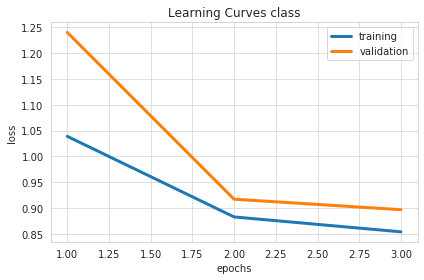

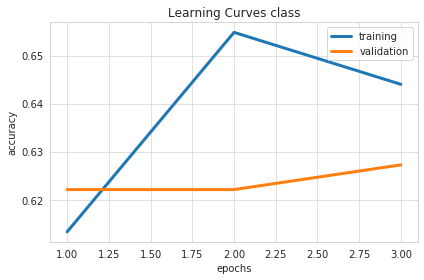

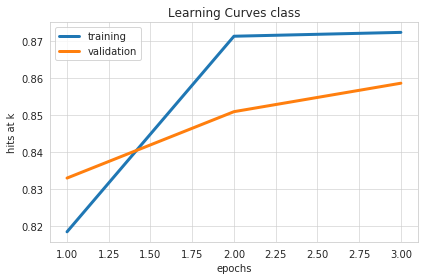

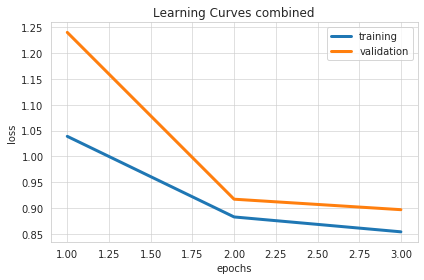

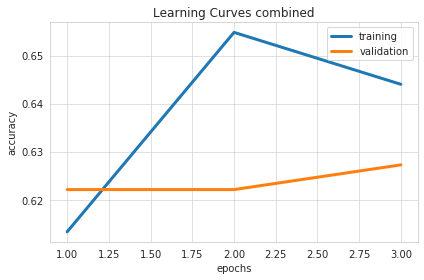

In [19]:
from ludwig import visualize
visualize.learning_curves(['../results/experiment_run_0/training_statistics.json'],None)

### There are other nice features in the Python API but the documentation is currently light


#### This example builds a Ludwig Model which can then be trained and tested with API calls

In [9]:
from ludwig.api import LudwigModel
ludwig_model = LudwigModel(model_definition = {...}, model_definition_file="../model_definition.yaml")

#### Feel free to experiement noting that without GPUs some of these commands will take several minutes to complete

In [11]:
train_stats = ludwig_model.train(data_csv="../data/raw/reuters-allcats.csv")

In [12]:
train_stats

{'train': OrderedDict([('class',
               OrderedDict([('loss',
                             [0.943211131182342,
                              0.825282311007235,
                              0.7663485076138166,
                              0.7476248362074337]),
                            ('accuracy',
                             [0.6541143654114365,
                              0.6980474198047419,
                              0.7095536959553695,
                              0.7196652719665272]),
                            ('hits_at_k',
                             [0.8486750348675035,
                              0.8807531380753139,
                              0.8842398884239888,
                              0.8919107391910739])])),
              ('combined',
               {'loss': [0.943211131182342,
                 0.825282311007235,
                 0.7663485076138166,
                 0.7476248362074337],
                'accuracy': [0.6541143654114365,
         

In [13]:
test_out = ludwig_model.test(data_csv="../data/raw/reuters-allcats.csv")

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
test_out

(     class_predictions  class_probabilities_<UNK>  class_probabilities_Neg-  \
 0                 Neg-               2.153744e-12                  0.666695   
 1                 Neg-               5.706744e-11                  0.591864   
 2                 Neg-               1.250269e-10                  0.630472   
 3                 Neg-               3.364084e-10                  0.762804   
 4                 Neg-               6.196103e-11                  0.700661   
 5                 Neg-               5.248419e-11                  0.609911   
 6                 Neg-               2.817819e-11                  0.798000   
 7                 Neg-               3.116053e-09                  0.741936   
 8                 Neg-               2.584710e-11                  0.747832   
 9                 Neg-               4.170731e-11                  0.634973   
 10                Neg-               2.730864e-12                  0.819131   
 11                Neg-               1.